In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt
from scipy import signal
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

## Read & Display  Images 

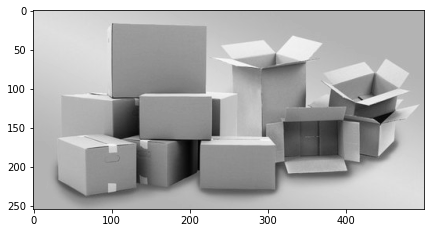

In [2]:
img1=cv2.imread('../input/cv-edge-detection/india-corrugated-boxes-market-jpg-500x500.jpg')
colorimg=img1.copy()
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(7,5))
plt.imshow(img1,cmap='gray')

## Smooth Image using GaussianBlur

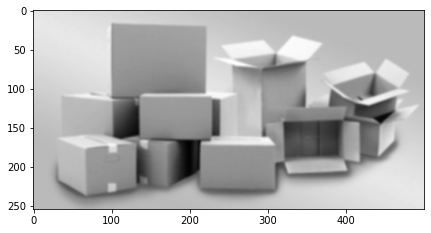

In [3]:
imgblru=cv2.GaussianBlur(img1,(5,5),1.4)
plt.figure(figsize=(7,5))
plt.imshow(imgblru,cmap='gray')

## Sobel Filters 

In [4]:
sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print('Soble Filter in X- Direction',sobel_x)
print('Soble Filter in Y- Direction',sobel_y)

Soble Filter in X- Direction [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Soble Filter in Y- Direction [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


## Image Derivitive using Sobel Filter 

In [5]:
fx=signal.convolve2d(imgblru,sobel_x,mode='same')
fy=signal.convolve2d(imgblru,sobel_y,mode='same')

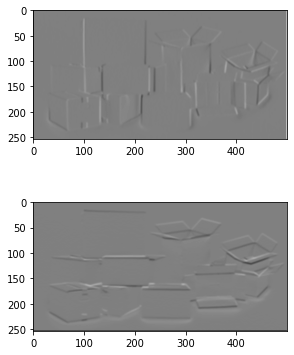

In [6]:
f=plt.figure(figsize=(10,10))
f.add_subplot(3,2,1)
plt.imshow(fx,cmap='gray')
f.add_subplot(3,2,3)
plt.imshow(fy,cmap='gray')

## Harris-Corner-Detection Algorithm

In [7]:
k = 0.04
CornerStrengthThreshold = 1500000
fx2=np.square(fx)
fy2=np.square(fy)
fxy=fx*fy
fyx=fy*fx
radius = 1
color = (255, 0, 0)  # Red
thickness = 1
R=np.zeros(imgblru.shape)
colorimg_1=np.copy(colorimg)
for row in range(imgblru.shape[0]):
    for col in range(imgblru.shape[1]):
        fx_2=fx2[row-1:row+2,col-1:col+2].sum()
        fy_2=fy2[row-1:row+2,col-1:col+2].sum()
        fxy_2=fxy[row-1:row+2,col-1:col+2].sum()
        fyx_2=fyx[row-1:row+2,col-1:col+2].sum()
        det = (fx_2 * fy_2) - (fxy_2*fyx_2)
        trace = fx_2 + fy_2
        r = det - k * (trace ** 2)
        R[row][col]=r
        if r>=CornerStrengthThreshold:
            cv2.circle(colorimg_1,(col,row),radius,color,thickness)

## Final Output 

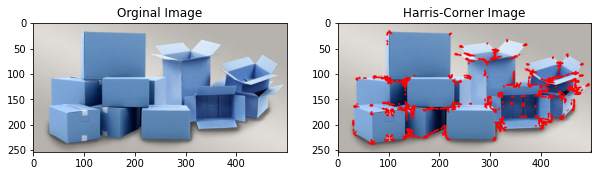

In [8]:
f=plt.figure(figsize=(10,10))
f.add_subplot(3,2,1)
plt.title('Orginal Image')
plt.imshow(colorimg,cmap='gray')
f.add_subplot(3,2,2)
plt.title('Harris-Corner Image')
plt.imshow(colorimg_1,cmap='gray')